In [639]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import geopandas as gpd
import os

In [640]:
import umap

In [641]:
delta_AGEB = pd.read_csv('/content/drive/MyDrive/Ciencia de Datos/Proyecto Final/delta_AGEB.csv')

In [642]:
correlaciones = delta_AGEB.corr(numeric_only=True)['PNACE_%'].sort_values(ascending=False)
result = pd.Series(correlaciones)
pd.set_option('display.max_rows', None)
result.head(10)

,PNACE_%
PNACE_%,1.000000
GRAPROES_M,0.533258
GRAPROES,0.527809
GRAPROES_F,0.509064
PROM_OCUP,0.471230
PRO_OCUP_C,0.287577
per_ocu_46,0.208865
grupo_62,0.193727
grupo_56,0.133336
PNACENT_F,0.116288


In [643]:
from sklearn.preprocessing import StandardScaler

#X = delta_AGEB.copy()
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

In [644]:
pesos = {
    'PNACE_%': 4.0,
    'PEA': 3.0,
    'GRAPROES': 4.0,
  'grupo_72': 1.5,
    'grupo_53': 1.5,
    'per_ocu_53': 1.5,
    'grupo_71': 1.5,
    'per_ocu_71': 1.5,
   'PRESOE': 2.0,
   'grupo_61': 1.5,
   'per_ocu_61': 1.5,
    'VIVPAR_UT':1.5
}


#X_scaled = X.copy()

# Aplicar los pesos solo a las columnas seleccionadas
#for columna, peso in pesos.items():
   # X_scaled[columna] = X_scaled[columna] * peso
#X_scaled = scaler.fit_transform(numericas)

In [645]:
from sklearn.preprocessing import RobustScaler

cols_a_dropear = delta_AGEB.filter(regex='(_F|_M)$').columns
delta_AGEB = delta_AGEB.drop(columns=cols_a_dropear)
delta_AGEB = delta_AGEB.drop(columns=["PNACENT", "PNACOE","VIVPAR_HAB"])
numericas = delta_AGEB.select_dtypes(include=[np.number]).copy()

numericas['PNACE_%'] *= 5
numericas['PEA'] *= 5
numericas['GRAPROES'] *= 2
numericas['grupo_72'] *= 1.5
numericas['grupo_53'] *= 1.5
numericas['per_ocu_53'] *= 1.5
numericas['grupo_71'] *= 1.5
numericas['per_ocu_71'] *= 1.5
numericas['PRESOE'] *= 2.0
numericas['grupo_61'] *= 1.5
numericas['per_ocu_61'] *= 1.5
numericas['VIVPAR_UT'] *= 1.5



scaler = RobustScaler()
#scaler = StandardScaler()
X_scaled = scaler.fit_transform(numericas)

In [646]:
delta_AGEB.isna().sum()

,0
POBTOT,0
POBFEM,0
POBMAS,0
PEA,0
PE_INAC,0
POCUPADA,0
PDESOCUP,0
PRES,0
PRESOE,0
GRAPROES,0


In [647]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [648]:
from sklearn.preprocessing import MinMaxScaler

variables = ['PNACE_%', 'PEA', 'GRAPROES']
weights = np.array([0.2, 0.2, 0.3])

scaler = MinMaxScaler()
#X_scaled = scaler.fit_transform(X[variables])
#X_scaled = X_scaled * weights

In [649]:
reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = reducer.fit_transform(X_scaled)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [650]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4, random_state=0)
clusters = gmm.fit_predict(X_umap)

In [651]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_umap, clusters)
print(f"Silhouette Score: {score:.3f}")

Silhouette Score: 0.829


In [652]:
#from sklearn.cluster import DBSCAN

# Puedes ajustar eps y min_samples según los datos
#dbscan = DBSCAN(eps=0.5, min_samples=20)
#clusters = dbscan.fit_predict(X_umap)

In [653]:
#mask = clusters != -1
#score = silhouette_score(X_umap[mask], clusters[mask])

#print(f"Silhouette Score: {score:.3f}")

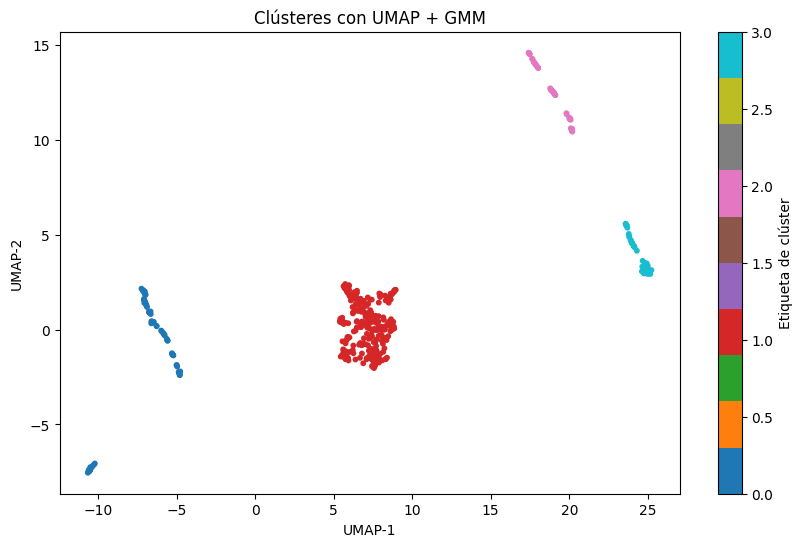

In [654]:
plt.figure(figsize=(10, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=clusters, cmap='tab10', s=10)
plt.title('Clústeres con UMAP + GMM')
plt.xlabel('UMAP-1')
plt.ylabel('UMAP-2')
plt.colorbar(label='Etiqueta de clúster')
plt.show()

In [655]:
numeric_cols = delta_AGEB.select_dtypes(include='number')

# Diccionario para guardar el número de outliers por columna
outliers_por_columna = {}

#for col in numeric_cols.columns:
 #   Q1 = numeric_cols[col].quantile(0.25)
 #   Q3 = numeric_cols[col].quantile(0.75)
 #   IQR = Q3 - Q1
 #   lower_bound = Q1 - 1.5 * IQR
 #   upper_bound = Q3 + 1.5 * IQR
 #   outliers = ((numeric_cols[col] < lower_bound) | (numeric_cols[col] > upper_bound)).sum()
 #   outliers_por_columna[col] = outliers

#outliers_df = pd.DataFrame.from_dict(outliers_por_columna, orient='index', columns=['n_outliers'])
#outliers_df = outliers_df.sort_values(by='n_outliers', ascending=False)

#print(outliers_df)

In [656]:
!pip install shapely

In [657]:
AGEB_20 = gpd.read_file('/content/drive/MyDrive/Ciencia de Datos/Proyecto Final/AGEB_2020.shp')

In [658]:
delta_AGEB['cluster'] = clusters

In [659]:
cols_a_agregar = AGEB_20.iloc[:, :8].copy()
cols_a_agregar['geometry'] = AGEB_20['geometry']

# Concatenar horizontalmente con delta_AGEB
AGEB_20_reset = AGEB_20.iloc[:, :10].copy().reset_index(drop=True)
AGEB_20_reset['geometry'] = AGEB_20['geometry'].reset_index(drop=True)

delta_AGEB_reset = delta_AGEB.reset_index(drop=True)

# Concatenar
delta_AGEB = pd.concat([AGEB_20_reset, delta_AGEB_reset], axis=1)


In [660]:
delta_AGEB_gdf = gpd.GeoDataFrame(delta_AGEB, geometry='geometry')

In [661]:
cluster_mean = delta_AGEB_gdf.groupby('cluster')['PNACE_%'].mean()

In [662]:
ordered_clusters = cluster_mean.sort_values(ascending=False).index.tolist()

In [663]:
jerarquia_dict = {cluster: rank+1 for rank, cluster in enumerate(ordered_clusters)}

In [664]:
delta_AGEB_gdf['jerarquia_cluster'] = delta_AGEB_gdf['cluster'].map(jerarquia_dict)

In [665]:
#delta_AGEB_gdf.sort_values(by='PNACE_%', inplace=True)
#delta_AGEB_gdf

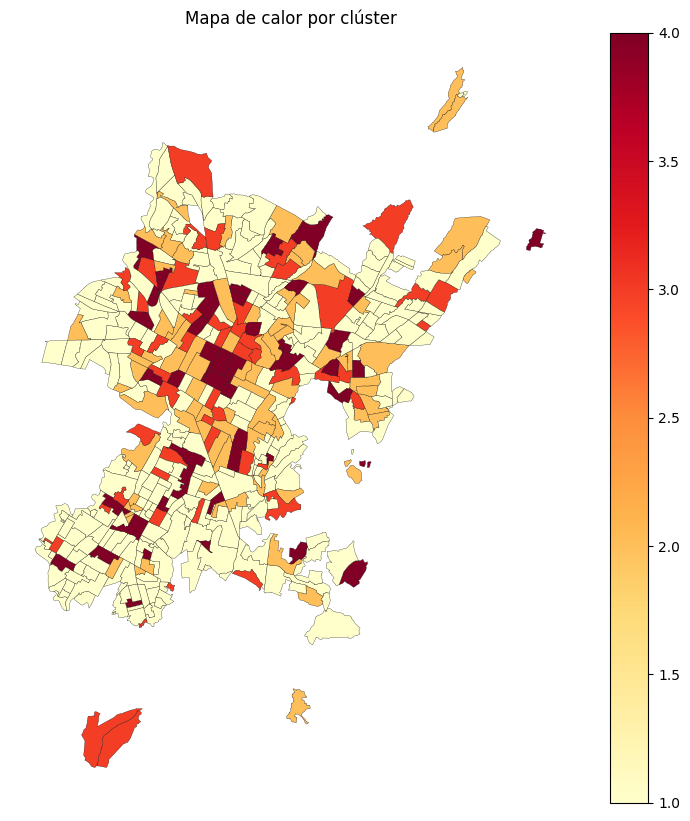

In [666]:
fig, ax = plt.subplots(figsize=(10, 10))

delta_AGEB_gdf.plot(column='jerarquia_cluster',
                ax=ax,
                legend=True,
                cmap='YlOrRd',  # Puedes cambiar a 'plasma', 'inferno', 'tab10', etc.
                edgecolor='black',
                linewidth=0.2)

ax.set_title("Mapa de calor por clúster")
plt.axis('off')
plt.show()

In [676]:
gdf = delta_AGEB_gdf.to_crs(epsg=4326)  # tu GeoDataFrame correctamente en lat/lon

# Calcula el centroide de TODO el conjunto de geometrías con unary_union sobre el GeoSeries:
centro = gdf.unary_union.centroid
gdf = gdf.dropna(subset=['jerarquia_cluster'])


import folium, branca.colormap as cm

# Crea el mapa
m = folium.Map(location=[centro.y, centro.x], zoom_start=12)

# Define escala de color para jerarquía
min_val = gdf['jerarquia_cluster'].min()
max_val = gdf['jerarquia_cluster'].max()
colormap = cm.linear.YlOrRd_09.scale(min_val, max_val)
colormap.caption = 'Jerarquía de Clústeres'

# Añade geometrías coloreadas
folium.GeoJson(
    gdf,
    style_function=lambda feat: {
        'fillColor'  : colormap(feat['properties']['jerarquia_cluster']),
        'color'      : 'black',
        'weight'     : 0.5,
        'fillOpacity': 0.7
    },
    tooltip=folium.GeoJsonTooltip(fields=['jerarquia_cluster'])
).add_to(m)

# Agrega la leyenda
colormap.add_to(m)

# Muestra el mapa

m.save(r"C:\Users\rican\Desktop\mapa.html")
import os
print(os.path.exists(r"C:\Users\rican\Desktop\mapa.html"))

<ipython-input-676-83d335a540aa>:4: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  centro = gdf.unary_union.centroid


True


In [668]:
m

Output hidden; open in https://colab.research.google.com to view.

In [669]:
from sklearn.metrics import davies_bouldin_score

# X_clustered: tus datos usados para clustering (e.g., tras UMAP o escalado)
# labels: las etiquetas de clúster asignadas por GMM, KMeans, etc.

score = davies_bouldin_score(X_umap, clusters)
print("Davies-Bouldin Index:", score)

Davies-Bouldin Index: 0.2944557850243794


In [670]:
from sklearn.metrics import calinski_harabasz_score

score = calinski_harabasz_score(X_umap, clusters)
print("Calinski-Harabasz Index:", score)

Calinski-Harabasz Index: 3239.8474


In [671]:
numericas['PNACE_%'] *= 3
numericas['PEA'] *= 3
numericas['GRAPROES'] *= 3
numericas['grupo_72'] *= 1.5
numericas['grupo_53'] *= 1.5
numericas['per_ocu_53'] *= 1.5
numericas['grupo_71'] *= 1.5
numericas['per_ocu_71'] *= 1.5
numericas['PRESOE'] *= 2.0
numericas['grupo_61'] *= 1.5
numericas['per_ocu_61'] *= 1.5
numericas['VIVPAR_UT'] *= 1.5

In [672]:
list(delta_AGEB.columns)

['AGEB',
 'CVEGEO',
 'CVE_ENT',
 'CVE_MUN',
 'CVE_LOC',
 'ENTIDAD',
 'NOM_ENT',
 'MUN',
 'NOM_MUN',
 'LOC',
 'geometry',
 'POBTOT',
 'POBFEM',
 'POBMAS',
 'PEA',
 'PE_INAC',
 'POCUPADA',
 'PDESOCUP',
 'PRES',
 'PRESOE',
 'GRAPROES',
 'VIVTOT',
 'TVIVHAB',
 'TVIVPAR',
 'TVIVPARHAB',
 'VIVPAR_DES',
 'VIVPAR_UT',
 'OCUPVIVPAR',
 'PROM_OCUP',
 'PRO_OCUP_C',
 'VPH_PISODT',
 'VPH_1DOR',
 'VPH_2YMASD',
 'VPH_1CUART',
 'VPH_2CUART',
 'VPH_3YMASC',
 'VPH_C_ELEC',
 'VPH_AGUADV',
 'VPH_EXCSA',
 'VPH_DRENAJ',
 'VPH_C_SERV',
 'VPH_REFRI',
 'VPH_LAVAD',
 'VPH_AUTOM',
 'VPH_RADIO',
 'VPH_TV',
 'VPH_PC',
 'VPH_TELEF',
 'VPH_CEL',
 'VPH_INTER',
 'grupo_11',
 'grupo_21',
 'grupo_22',
 'grupo_23',
 'grupo_43',
 'grupo_46',
 'grupo_51',
 'grupo_52',
 'grupo_53',
 'grupo_54',
 'grupo_55',
 'grupo_56',
 'grupo_61',
 'grupo_62',
 'grupo_71',
 'grupo_72',
 'grupo_81',
 'grupo_93',
 'grupo_31-3',
 'grupo_48-4',
 'per_ocu_11',
 'per_ocu_21',
 'per_ocu_22',
 'per_ocu_23',
 'per_ocu_43',
 'per_ocu_46',
 'per_ocu_

In [673]:
delta_AGEB_gdf = delta_AGEB_gdf.dropna()

In [674]:
from sklearn.feature_selection import f_classif
import pandas as pd

# 1. Asumimos que tu columna de clústeres se llama 'cluster'
# (si tiene otro nombre, reemplázalo)
clusters = delta_AGEB_gdf['jerarquia_cluster']

# 2. Seleccionamos solo las columnas numéricas, excepto la columna de clúster
X = delta_AGEB_gdf.select_dtypes(include='number').drop(columns='jerarquia_cluster')

# 3. Aplicar ANOVA
F, p = f_classif(X, clusters)

# 4. Mostrar resultados ordenados por mayor F-score
anova_results = pd.DataFrame({
    'Variable': X.columns,
    'F_score': F,
    'p_value': p
}).sort_values('F_score', ascending=False)

print(anova_results)

      Variable     F_score       p_value
84     cluster         inf  0.000000e+00
80  per_ocu_93  133.254208  6.392090e-62
50    grupo_52   31.238163  2.250204e-18
58    grupo_72   15.720915  9.624647e-10
5       POBFEM   10.744608  7.808834e-07
4       POBTOT   10.500737  1.088082e-06
6       POBMAS   10.096213  1.887602e-06
46    grupo_23   10.050438  2.009108e-06
8      PE_INAC    9.389660  4.949092e-06
11        PRES    8.988033  8.567553e-06
20  OCUPVIVPAR    8.856959  1.024925e-05
54    grupo_56    8.795596  1.114652e-05
16     TVIVPAR    8.035163  3.156557e-05
10    PDESOCUP    7.960507  3.496484e-05
60    grupo_93    7.749706  4.667445e-05
37   VPH_RADIO    7.253326  9.217320e-05
22  PRO_OCUP_C    7.158452  1.049794e-04
14      VIVTOT    6.830435  1.646131e-04
40   VPH_TELEF    6.485851  2.640556e-04
45    grupo_22    5.938843  5.589681e-04
17  TVIVPARHAB    5.400792  1.167978e-03
15     TVIVHAB    5.384690  1.194002e-03
7          PEA    4.533251  3.820374e-03
38      VPH_TV  

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [ 0  1  2 84] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


<ipython-input-675-89b4a63ca90b>:12: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = libpysal.weights.Queen.from_dataframe(delta_AGEB_gdf)
/usr/local/lib/python3.11/dist-packages/libpysal/weights/contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 11 disconnected components.
 There are 7 islands with ids: 0, 2, 3, 4, 7, 8, 163.
  W.__init__(self, neighbors, ids=ids, **kw)


('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 2, ' is an island (no neighbors)')
('WARNING: ', 3, ' is an island (no neighbors)')
('WARNING: ', 4, ' is an island (no neighbors)')
('WARNING: ', 7, ' is an island (no neighbors)')
('WARNING: ', 8, ' is an island (no neighbors)')
('WARNING: ', 163, ' is an island (no neighbors)')
Moran's I: 0.11271228408229592
p-value: 0.001


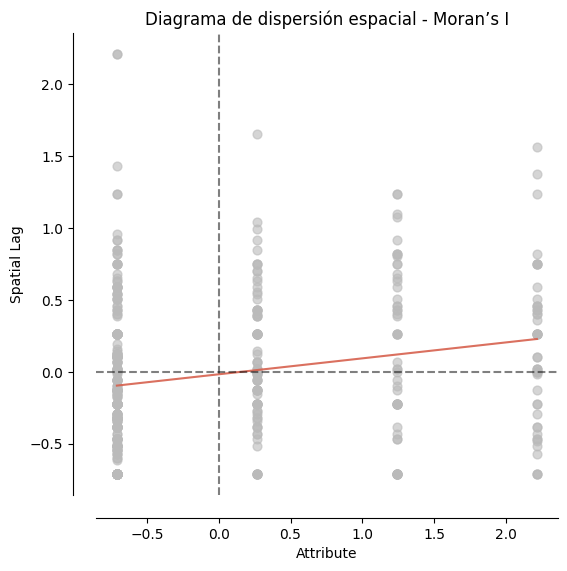

In [675]:
import geopandas as gpd
import libpysal
!pip install --quiet esda splot libpysal
from esda.moran import Moran
import matplotlib.pyplot as plt
import splot.esda as esda_plot

# Asegúrate de estar usando un sistema de coordenadas proyectado (por ejemplo, UTM)
delta_AGEB_gdf = delta_AGEB_gdf.to_crs(epsg=32614)  # Cambia EPSG según tu zona

# Crear pesos espaciales basados en vecinos contiguos (Queen contiguity)
w = libpysal.weights.Queen.from_dataframe(delta_AGEB_gdf)
w.transform = 'r'

# Variable a analizar (puede ser el número del clúster o la PNACE_%)
y = delta_AGEB_gdf['jerarquia_cluster']

# Calcular Moran's I
moran = Moran(y, w)

# Mostrar resultados
print(f"Moran's I: {moran.I}")
print(f"p-value: {moran.p_sim}")

# Graficar diagrama de dispersión espacial
fig, ax = plt.subplots(figsize=(8, 6))
esda_plot.moran_scatterplot(moran, ax=ax)
ax.set_title("Diagrama de dispersión espacial - Moran’s I")
plt.show()